<a href="https://colab.research.google.com/github/cristopherolivares/RepasoPython/blob/master/colas_1310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADT Queue

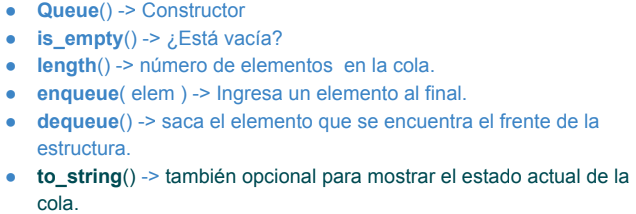

In [1]:
class Queue:
  def __init__( self ):
    self.data = []
    
  def is_empty( self ):
    return len( self.data ) == 0

  def lenght( self ):
    return len( self.data )

  def enqueue( self , value ):
    self.data.append( value )

  def dequeue( self ):
    return self.data.pop( 0 )

  def to_string( self ):
    for elem in self.data:
      print( f"| { elem } | <--" , end ="")
    print("")

In [2]:
cola = Queue()
print( "Está vació: " , cola.is_empty())
print( "Número de elementos = " , cola.lenght())
cola.enqueue(10)
cola.enqueue(20)
cola.enqueue(30)
print( "Está vació: " , cola.is_empty())
print( "Número de elementos = " , cola.lenght())
cola.enqueue(40)
cola.enqueue(50)
cola.enqueue(60)
cola.to_string()
siguiente = cola.dequeue()
print( "Atendiendo a" , siguiente )
cola.to_string()

Está vació:  True
Número de elementos =  0
Está vació:  False
Número de elementos =  3
| 10 | <--| 20 | <--| 30 | <--| 40 | <--| 50 | <--| 60 | <--
Atendiendo a 10
| 20 | <--| 30 | <--| 40 | <--| 50 | <--| 60 | <--


# Varientes del ADT cola
1. Circulares
2. Prioridad
  1. Acotada
  1. No acotada 

## Cola de prioridad acotada

In [34]:
# Implementacion de la cola de prioridad acotada
class BoundedPriorityQueue:
  def __init__( self , niveles ):
    self.__data = [Queue() for x in range(niveles)]
    #self.__data = Array( niveles )
    #self.__data.clear( Queue() )
    self.__size = 0 # el numero de elemtos ya ingrasado en la lista

  def is_empty( self ):
    return self.__size == 0

  def lenght( self ):
    return self.__size

  def enqueue( self , prioridad , elem ):
    if prioridad <= len( self.__data ) \
      and prioridad >= 0:
      self.__data[ prioridad ].enqueue( elem )
      self.__size += 1

  def dequeue( self ):
    nivel = 0 
    while self.__data[nivel].is_empty() \
        and nivel < self.lenght():
      nivel += 1
    
    if nivel >= self.lenght():
      print("Cola está vacía")
    else:
      return self.__data[ nivel ].dequeue()

  def to_string( self ):
    prioridad = 0
    for cola in self.__data:
      print(f"Prioridad {prioridad } ->" , end = "")
      cola.to_string()
      prioridad += 1
        

In [33]:
# prueba de la cola con prioridad
salvavidas = BoundedPriorityQueue( 7 )
salvavidas.enqueue( 4 , "Maestro" )
salvavidas.enqueue( 1 , "Niños" )
salvavidas.enqueue( 4 , "Mecanicos" )
salvavidas.enqueue( 3 , "Mujeres" )
salvavidas.enqueue( 2 , "Tercera edad" )
salvavidas.enqueue( 1 , "Niñas" )
salvavidas.enqueue( 3 , "Hombre" )
salvavidas.enqueue( 4 , "Vigia" )
salvavidas.enqueue( 5 , "Capitán" )
salvavidas.enqueue( 4 , "Timonel" )
print("-.-.-.")
salvavidas.to_string()
print("-.-.-.")
sig = salvavidas.dequeue()
print( f"Subiendo {sig} al siguinte bote salvavidas" )
salvavidas.to_string()
print("-.-.-.")
sig = salvavidas.dequeue()
print( f"Subiendo {sig} al siguinte bote salvavidas" )
salvavidas.to_string()
print("-.-.-.")
sig = salvavidas.dequeue()
print( f"Subiendo {sig} al siguinte bote salvavidas" )
salvavidas.to_string()
print("-.-.-.")

-.-.-.
Prioridad 0 ->
Prioridad 1 ->| Niños | <--| Niñas | <--
Prioridad 2 ->| Tercera edad | <--
Prioridad 3 ->| Mujeres | <--| Hombre | <--
Prioridad 4 ->| Maestro | <--| Mecanicos | <--| Vigia | <--| Timonel | <--
Prioridad 5 ->| Capitán | <--
Prioridad 6 ->
-.-.-.
Subiendo Niños al siguinte bote salvavidas
Prioridad 0 ->
Prioridad 1 ->| Niñas | <--
Prioridad 2 ->| Tercera edad | <--
Prioridad 3 ->| Mujeres | <--| Hombre | <--
Prioridad 4 ->| Maestro | <--| Mecanicos | <--| Vigia | <--| Timonel | <--
Prioridad 5 ->| Capitán | <--
Prioridad 6 ->
-.-.-.
Subiendo Niñas al siguinte bote salvavidas
Prioridad 0 ->
Prioridad 1 ->
Prioridad 2 ->| Tercera edad | <--
Prioridad 3 ->| Mujeres | <--| Hombre | <--
Prioridad 4 ->| Maestro | <--| Mecanicos | <--| Vigia | <--| Timonel | <--
Prioridad 5 ->| Capitán | <--
Prioridad 6 ->
-.-.-.
Subiendo Tercera edad al siguinte bote salvavidas
Prioridad 0 ->
Prioridad 1 ->
Prioridad 2 ->
Prioridad 3 ->| Mujeres | <--| Hombre | <--
Prioridad 4 ->| Maest

In [54]:
# implementacion de las colas de prioridad sin acotamiento
class PriorityQueue:
  def __init__( self ):
    self.__data = []
    self.__size = 0

  def is_empty( self ):
    return self.__size == 0

  def lenght( self ):
    return self.__size

  def enqueue(self , prioridad , elem ):
    existe = False
    indice = 0
    for index in range(len(self.__data)):
      if self.__data[index][ "prioridad" ] == prioridad:
        existe = True
        indice = index
        
    if existe:
      self.__data[indice]["cola"].enqueue(elem)
    else:
      self.__data.append( {"prioridad":prioridad , "cola": Queue() } )
      self.__data[-1]["cola"].enqueue(elem)
  
  def to_string( self ):
    for cola in self.__data:
      cola[ "cola" ].to_string()       

In [55]:
cp = PriorityQueue()
cp.enqueue(1 , "niñas")
cp.enqueue(2 , "niños")
cp.enqueue(3 , "profesor")
cp.enqueue(0 , "presidente")
cp.to_string()

| niñas | <--
| niños | <--
| profesor | <--
| presidente | <--


In [3]:
class BoundedPriorityQueue:
  def __init__( self , niveles ):
    self.__data = [Queue() for x in range(niveles)]
    self.__size = 0

  def is_empty( self ):
    return len( self.__data ) == 0

  def is_empty( self ):
    return len( self.__data )

  def lenght( self ):
    return len( self.__data )

  def enqueue( self , value ):
    self.__data.append( value )
    self.__size += 1

  def dequeue( self ):
    return self.__data.pop( 0 )
    self.__size -= 1

  def to_string( self ):
    for elem in self.__data:
      print( f"| { elem } | <--" , end ="")
    print("")



## Cola de prioridad no acotada

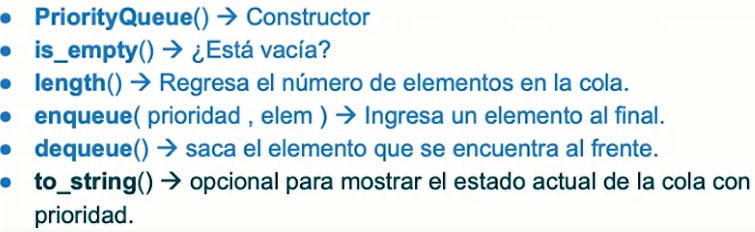

In [4]:
class PriorityQueue:
  def __init__( self ):
    self.__data = []
  
  def is_empty( self ):
    return len( self.__data ) == 0

  def lenght( self ):
    return len( self.__data )

  def enqueue( self , value ):
    self.__data.append( value )
    self.__data.sort()

  def dequeue( self ):
    return self.__data.pop( 0 )

  def to_string( self ):
    for elem in self.__data:
      print( f"| { elem } | <--" , end ="")
    print("")



prueba = PriorityQueue()
prueba.enqueue(5)
prueba.enqueue(6)
prueba.enqueue(3)
prueba.enqueue(9)
prueba.enqueue(9)
prueba.enqueue(13)
prueba.dequeue()
prueba.to_string()


| 5 | <--| 6 | <--| 9 | <--| 9 | <--| 13 | <--
